#### Probamos las diferentes funciones de la libreria

In [13]:
# Importamos las librerias que vamos a utilizar
import fastf1 as f1
import fastf1.plotting
from matplotlib import pyplot as plt

# Cargamos el cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

##### Aprendemos a usar Session

In [39]:
# Cargamos los datos del Gran Premio de Italia 2024
sesion = f1.get_session(2024, 16, 'R')

# Mostramos el nombre de la sesion, nombre y fecha de la carrera
print(sesion.name)
print(sesion.date)

Race
2024-09-01 13:00:00


In [40]:
# Cargamos los datos de la sesion
sesion.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/16/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1

In [41]:
# Obtenemos los datos del piloto
colapinto = sesion.get_driver('COL')

In [42]:
# Obtemos datos de la pista
pista = sesion.get_circuit_info()

##### Aprendemos a usar Laps

In [60]:
vueltas = sesion.laps.pick_teams(['McLaren', 'Williams'])

##### Aprendemos a usar Lap

In [69]:
vuelta = sesion.laps.pick_fastest()

vuelta.get_car_data()


,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2024-09-01 14:17:00.435,11348,321,8,99,False,0,car,0 days 00:00:00.282000,0 days 02:09:16.516000
1,2024-09-01 14:17:00.595,11390,321,8,99,False,0,car,0 days 00:00:00.442000,0 days 02:09:16.676000
2,2024-09-01 14:17:00.835,11397,323,8,100,False,0,car,0 days 00:00:00.682000,0 days 02:09:16.916000
3,2024-09-01 14:17:01.115,11488,325,8,99,False,0,car,0 days 00:00:00.962000,0 days 02:09:17.196000
4,2024-09-01 14:17:01.395,11516,326,8,99,False,0,car,0 days 00:00:01.242000,0 days 02:09:17.476000
...,...,...,...,...,...,...,...,...,...,...
302,2024-09-01 14:18:20.475,11017,312,8,100,False,0,car,0 days 00:01:20.322000,0 days 02:10:36.556000
303,2024-09-01 14:18:20.675,11089,313,8,99,False,0,car,0 days 00:01:20.522000,0 days 02:10:36.756000
304,2024-09-01 14:18:20.915,11149,315,8,100,False,0,car,0 days 00:01:20.762000,0 days 02:10:36.996000
305,2024-09-01 14:18:21.195,11118,316,8,100,False,0,car,0 days 00:01:21.042000,0 days 02:10:37.276000


#### Aprendemos a usar Telemetry

In [77]:
vuelta_COL = sesion.laps.pick_driver('COL')
vuelta_esp = vuelta_COL.pick_lap(16)
telemetria = vuelta_esp.get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


#### Aprendemos a usar Results

In [79]:
# Guardamos los resultados de la sesion
resultados = sesion.results

In [83]:
# Accedemos a los resultados de un piloto 
nombre_piloto = 'Franco Colapinto'
piloto = resultados[resultados['FullName'] == nombre_piloto]
print(piloto)

   DriverNumber BroadcastName Abbreviation    DriverId  TeamName TeamColor  \
43           43   F COLAPINTO          COL  colapinto   Williams    64C4FF   

      TeamId FirstName   LastName          FullName  ... CountryCode Position  \
43  williams    Franco  Colapinto  Franco Colapinto  ...         ARG     12.0   

    ClassifiedPosition GridPosition  Q1  Q2  Q3                   Time  \
43                  12         18.0 NaT NaT NaT 0 days 00:01:21.308000   

      Status Points  
43  Finished    0.0  

[1 rows x 21 columns]


#### Otras funciones

In [6]:
# Seteamos algunos parametros para el grafico
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

# Extraemos algunos datos para su representación grafica
vuelta_colapinto = sesion.laps.pick_driver('COL').pick_fastest()
col_datos_auto = vuelta_colapinto.get_car_data()
tiempo = col_datos_auto['Time']
velocidad = col_datos_auto['Speed']

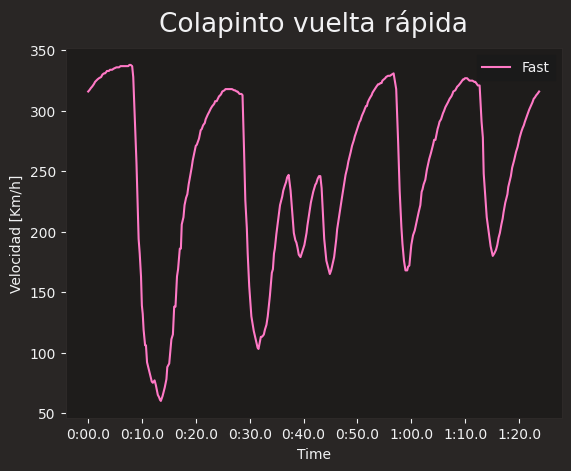

In [8]:
# Grafico de la vuelta más rapida del piloto, con la velocidad alcanzada
fig, ax = plt.subplots()
ax.plot(tiempo, velocidad, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Velocidad [Km/h]')
ax.set_title('Colapinto vuelta rápida')
ax.legend()
plt.show()